In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm


import matplotlib as mpl

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_style("whitegrid")

/Users/conormd/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


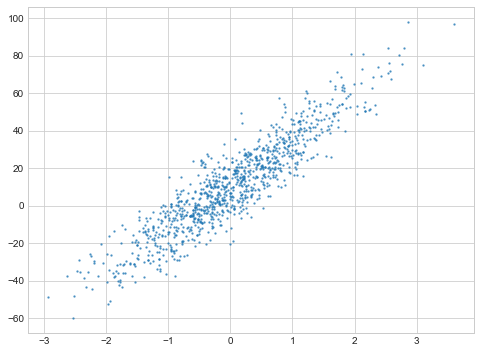

In [3]:
n = 1000
x = np.random.normal(size=n)
y = 10 + 23 * x + np.random.normal(loc=0, scale=10, size=n)
plt.scatter(x, y, alpha = .6, s=2);

In [4]:
lm = pm.Model()
with lm:
    
    a = pm.Normal("a", 5, sd=3)
    b = pm.Normal("b", .9, sd=3)
    e = pm.HalfCauchy("e", 1)
    
    u = a + b * x 
    yhat = pm.Normal("yhat", u, e, observed=y)
    
    out = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/conormd/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [e_log__, b, a]
100%|██████████| 1000/1000 [00:01<00:00, 743.53it/s]


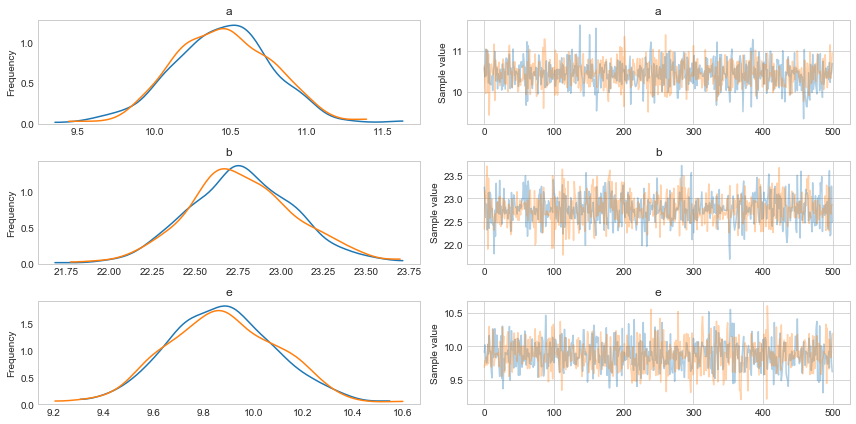

In [5]:
pm.traceplot(out);